In [2]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------------------  245.8/250.0 kB 7.4 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import data
xl = pd.ExcelFile("./test_data.xlsx")

In [4]:
# Reading Excel File
df = xl.parse('Year 2009-2010')

In [11]:
# Read data from index 38000 to 42000
subset_df = df.loc[342000:346000]

In [12]:
subset_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
342000,522789,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,4,2010-09-16 14:41:00,3.25,14221.0,United Kingdom
342001,522789,21733,RED HANGING HEART T-LIGHT HOLDER,6,2010-09-16 14:41:00,2.95,14221.0,United Kingdom
342002,522789,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-09-16 14:41:00,2.95,14221.0,United Kingdom
342003,522789,22354,RETROSPOT PADDED SEAT CUSHION,5,2010-09-16 14:41:00,3.75,14221.0,United Kingdom
342004,522789,84839,SWEETHEART KEY CABINET,2,2010-09-16 14:41:00,6.75,14221.0,United Kingdom


In [13]:
# Check for NaN values in the entire DataFrame
subset_df.isna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
342000,False,False,False,False,False,False,False,False
342001,False,False,False,False,False,False,False,False
342002,False,False,False,False,False,False,False,False
342003,False,False,False,False,False,False,False,False
342004,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
345996,False,False,False,False,False,False,False,False
345997,False,False,False,False,False,False,False,False
345998,False,False,False,False,False,False,False,False
345999,False,False,False,False,False,False,False,False


In [14]:
# Remove missing values from a DataFrame
clean_df = subset_df.dropna()

---

### Test 1 Patch(1)


In [15]:
# Preview data
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
342000,522789,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,4,2010-09-16 14:41:00,3.25,14221.0,United Kingdom
342001,522789,21733,RED HANGING HEART T-LIGHT HOLDER,6,2010-09-16 14:41:00,2.95,14221.0,United Kingdom
342002,522789,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-09-16 14:41:00,2.95,14221.0,United Kingdom
342003,522789,22354,RETROSPOT PADDED SEAT CUSHION,5,2010-09-16 14:41:00,3.75,14221.0,United Kingdom
342004,522789,84839,SWEETHEART KEY CABINET,2,2010-09-16 14:41:00,6.75,14221.0,United Kingdom
...,...,...,...,...,...,...,...,...
345996,523015,22512,DOORSTOP RACING CAR DESIGN,4,2010-09-20 10:23:00,3.75,15462.0,United Kingdom
345997,523015,22513,DOORSTOP FOOTBALL DESIGN,4,2010-09-20 10:23:00,3.75,15462.0,United Kingdom
345998,523015,21668,RED STRIPE CERAMIC DRAWER KNOB,24,2010-09-20 10:23:00,1.25,15462.0,United Kingdom
345999,523015,21669,BLUE STRIPE CERAMIC DRAWER KNOB,24,2010-09-20 10:23:00,1.25,15462.0,United Kingdom


In [21]:
# Q1: The amount of unique invoices in the provided dataset for indexes (399000, 403000) is equal to ==> 200
clean_df['Invoice'].nunique()  # 200
# Q2-1: The country with the most orders is , with the amount of? ==> United Kingdom	2514
clean_df.groupby('Country')['Invoice'].count().nlargest(1).reset_index()  # United Kingdom	2514

# Q3-1:The country with the least orders is ,  with the amount of ==> Australia	5
clean_df.groupby('Country')['Invoice'].count().nsmallest(1).reset_index()  # Australia	5

# Q4-1:The highest total price per item in one order was, in order with id? ==> 492724	8370.08
# First create the total column based on Price * Quantity to represent total price per item
clean_df['Total'] = clean_df['Price'] * clean_df['Quantity']
clean_df.groupby('Invoice')['Total'].sum().nlargest(1)  # Invoice:492724	Total:8370.08

# Q5-1: The second highest spending customer with id, ordered a total of?
clean_df.groupby('Customer ID')['Total'].sum().nlargest(2).reset_index() # Customer ID: 15311.0	Total: 2310.51

C:\Users\User\AppData\Local\Temp\ipykernel_9644\3431560881.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total'] = clean_df['Price'] * clean_df['Quantity']


,Customer ID,Total
0,13881.0,6886.22
1,17706.0,3485.31


-------


In [140]:
# You are supposed to analyze data in indexes between (171000, 175000)
# Read data from index 171000 to 175000
subset_df_2 = df.loc[171000:175000]
# Check for NaN values in the entire DataFrame
subset_df_2.isna().reset_index()
# Remove missing values from a DataFrame
clean_df = subset_df_2.dropna()

df.to_excel('varun_clean_df.xlsx', index=False)
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
171000,505588,21373,MIRRORED WALL ART SNOWFLAKES,1,2010-04-23 12:20:00,2.55,15548.0,United Kingdom
171001,505588,21371,MIRRORED WALL ART POPPIES,1,2010-04-23 12:20:00,2.55,15548.0,United Kingdom
171002,505588,85152,HAND OVER THE CHOCOLATE SIGN,1,2010-04-23 12:20:00,2.10,15548.0,United Kingdom
171003,505588,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-04-23 12:20:00,2.55,15548.0,United Kingdom
171004,505588,22565,FELTCRAFT HAIRBANDS PINK AND WHITE,12,2010-04-23 12:20:00,0.85,15548.0,United Kingdom


In [145]:
# The amount of unique invoices in the provided dataset for indexes (171000, 175000) is equal to ==> 157
clean_df['Invoice'].nunique()
# The country with the most orders is ==> United Kingdom, with the amount of : 3027
clean_df.groupby('Country')['Invoice'].count().nlargest(1)
# The country with the least orders is, with the amount of ==> Sweden	9
clean_df.groupby('Country')['Invoice'].count().nsmallest(1)
# The highest total price per item in one order was, in order with id
clean_df['Total'] = clean_df['Price'] * clean_df['Quantity']
clean_df.groupby('Invoice')['Total'].sum().nlargest(
    1)  # Invoice:505747	Total:3256.64
# The second highest spending customer with id, ordered a total of
clean_df.groupby('Customer ID')['Total'].sum().nlargest(
    2)  # Customer ID: 13881.0	Total: 3375.96

C:\Users\User\AppData\Local\Temp\ipykernel_51136\1975345868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Total'] = clean_df['Price'] * clean_df['Quantity']


Customer ID
16684.0    6598.26
13881.0    3375.96
Name: Total, dtype: float64

---


In [76]:
# Total Number of Products
# The nunique() method returns the number of unique values for each column.
print(clean_df['StockCode'].nunique())

# Average Quantity per Order:
# Calculate the mean of the 'Quantity' column. to get the average
print(clean_df['Quantity'].mean())

# Range of Invoice Dates
print(clean_df['InvoiceDate'].min(), clean_df['InvoiceDate'].max())

# Top 3 Customers by Order Count
#  The value_counts() function returns an object containing counts of unique values.
# This means it enables us to count the number of unique elements in a column of a Pandas dataframe.
clean_df['Customer ID'].value_counts()

# Average Spend per (for each)Customer
clean_df.groupby('Customer ID')['Price'].mean().sort_values(ascending=False)

# New vs Returning Customers:
clean_df.groupby('Customer ID')[
    'InvoiceDate'].min().sort_values(ascending=False)

# Most Sold Items: Identify top 3 products by quantity sold.
clean_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

# Items Never Sold: Find products that have never been ordered.
clean_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=True)


# Seasonal Product Trends: Analyze product sales over different months.
# Converting 'InvoiceDate' to a datetime format if it's not already

clean_df['InvoiceDate'] = pd.to_datetime(clean_df['InvoiceDate'])
# Extracting the month from 'InvoiceDate'
clean_df['Month'] = clean_df['InvoiceDate'].dt.month
# Grouping by 'StockCode' and 'Month', then summing the 'Quantity' to analyze sales
seasonal_trends = clean_df.groupby(['StockCode', 'Month'])[
    'Quantity'].sum().reset_index()
seasonal_trends
#  How many different countries are represented in the dataset?
print(clean_df['Country'].nunique())
# Count the number of unique stock codes.
print(clean_df['StockCode'].nunique())
# Calculate the total quantity of items sold.
print(clean_df['Quantity'].sum())

#  =========================================================

# What is the earliest invoice date in the dataset?
print(
    f"the earliest invoice date in the dataset: {clean_df['InvoiceDate'].sort_values(ascending=True)}")

# What is the average price of items in the dataset?
print(f"the average price of items in the dataset: {clean_df['price'].mean()}")

# Q7: Total number of customers
total_customers = clean_df['Customer ID'].nunique()

# Q8: Total quantity of items sold
total_quantity_sold = clean_df['Quantity'].sum()

# Q9: Latest date of invoice
latest_invoice_date = clean_df['InvoiceDate'].max()

# Q10: Median value of item prices
median_price = clean_df['Price'].median()

# Q11: Total revenue for the dataset
total_revenue = clean_df['Total'].sum()

# Q12: Average quantity per invoice
avg_quantity_per_invoice = clean_df.groupby('Invoice')['Quantity'].mean()

# Q13: Top 3 most sold items
top_items = clean_df.groupby('Description')['Quantity'].sum().nlargest(3)

# Q14: Item with highest individual price
highest_price_item = clean_df.loc[clean_df['Price'].idxmax(), 'Description']

# Q15: Top 5 countries in terms of total revenue
top_countries_revenue = clean_df.groupby('Country')['Total'].sum().nlargest(5)

# Q16: Total revenue per country
revenue_per_country = clean_df.groupby('Country')['Total'].sum()

# Q17: Average price of items sold per country
avg_price_per_country = clean_df.groupby('Country')['Price'].mean()

# Q18: Top 3 months in terms of sales volume
clean_df['Month'] = clean_df['InvoiceDate'].dt.month
sales_volume_per_month = clean_df.groupby(
    'Month')['Quantity'].sum().nlargest(3)

# Q19: Customer with the highest number of transactions
top_customer_transactions = clean_df['Customer ID'].value_counts().idxmax()

# Q20: Average transaction value per invoice
avg_transaction_value = clean_df.groupby('Invoice')['Total'].mean()

# Q21: Month with highest total revenue
highest_revenue_month = clean_df.groupby('Month')['Total'].sum().idxmax()

# Q22: Item with highest revenue contribution
highest_revenue_item = clean_df.groupby('Description')['Total'].sum().idxmax()

# Q23: Monthly growth rate in total revenue
monthly_revenue = clean_df.groupby('Month')['Total'].sum()
monthly_growth_rate = monthly_revenue.pct_change().dropna()

# Q24: Customer with highest total spending
highest_spending_customer = clean_df.groupby(
    'Customer ID')['Total'].sum().idxmax()

# Q25: Day of week with highest average sales volume
clean_df['DayOfWeek'] = clean_df['InvoiceDate'].dt.dayofweek
avg_sales_volume_dayofweek = clean_df.groupby(
    'DayOfWeek')['Quantity'].mean().idxmax()

# Q26: Cohort analysis based on first purchase month
clean_df['CohortMonth'] = clean_df.groupby(
    'Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')
cohort_analysis = clean_df.groupby(
    ['CohortMonth', 'Month']).agg('nunique')['Customer ID']

# Q27: Stock code with largest average transaction value
largest_avg_transaction_stock = clean_df.groupby(
    'StockCode')['Total'].mean().idxmax()

# Q28: Repeat purchase rate per customer
repeat_purchase_rate = clean_df['Customer ID'].value_counts().mean()

# Q29: Average purchase interval for each customer
clean_df['InvoiceDate'] = pd.to_datetime(clean_df['InvoiceDate'])
purchase_intervals = clean_df.groupby(
    'Customer ID')['InvoiceDate'].apply(lambda x: x.diff().mean())

# Q30: Seasonal trends analysis
clean_df['Quarter'] = clean_df['InvoiceDate'].dt.quarter
seasonal_trends = clean_df.groupby('Quarter')['Quantity'].sum()

1281
9.927943760984183
2009-12-17 12:46:00 2009-12-21 09:00:00
7
1281
28245


C:\Users\User\AppData\Local\Temp\ipykernel_51136\831707858.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['InvoiceDate'] = pd.to_datetime(clean_df['InvoiceDate'])
C:\Users\User\AppData\Local\Temp\ipykernel_51136\831707858.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Month'] = clean_df['InvoiceDate'].dt.month


---


In [23]:
cdf = pd.read_csv("./data_test_clustering_A1.csv")

In [24]:
cdf.head()

,Unnamed: 0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,0,-3.570594,-8.634479,2.583979,10.796969,0.0,0.0,0.0,0.0
1,1,-5.141801,-9.480061,-0.452732,10.239413,0.0,0.0,0.0,0.0
2,2,5.442349,6.900069,0.857940,-9.532804,0.0,0.0,0.0,0.0
3,3,7.740632,-7.739564,3.524483,1.975055,0.0,0.0,0.0,0.0
4,4,-4.273923,-8.461581,1.884085,9.813837,0.0,0.0,0.0,0.0


In [25]:
range_cdf = cdf.loc[33654: 34550]

In [26]:
range_cdf.head()

,Unnamed: 0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
33654,33654,9.334574,-11.061297,-4.115648,-8.224453,5.048854,0.0,0.0,0.0
33655,33655,8.237714,6.986733,3.978684,4.394262,3.988520,0.0,0.0,0.0
33656,33656,8.228386,9.255234,2.870936,4.277417,2.904004,0.0,0.0,0.0
33657,33657,8.203598,9.259705,1.646897,5.490423,5.260738,0.0,0.0,0.0
33658,33658,8.991461,-10.448637,-3.896034,-7.028710,6.691118,0.0,0.0,0.0


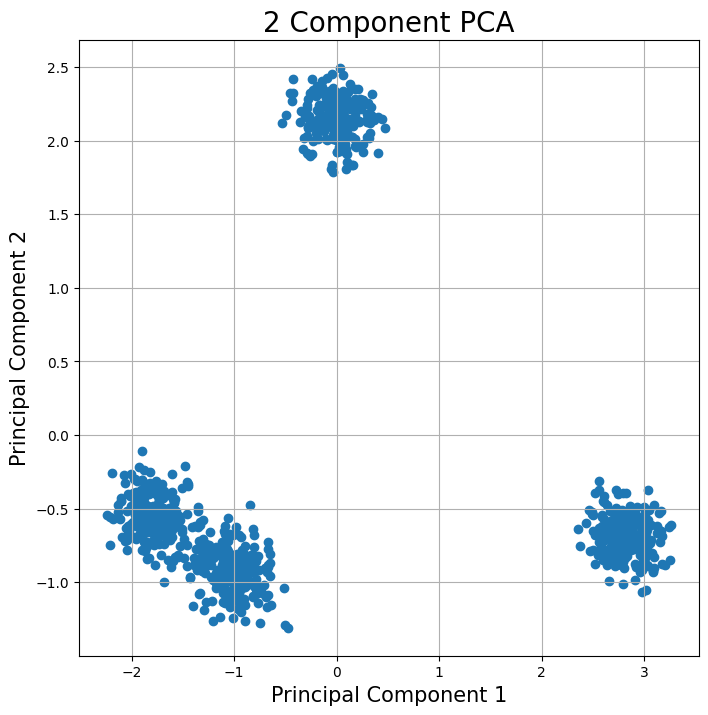

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
features = range_cdf.drop('Unnamed: 0', axis=1)

# Standardize the features
features = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'principal component 1', 'principal component 2'])

# Visualize the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)

ax.scatter(principalDf['principal component 1'],
           principalDf['principal component 2'])
ax.grid()

In [ ]:
principalDf.shape

(897, 2)

In [30]:
# Assuming principalDf is your DataFrame with the PCA components
most_significant_pca_value_801 = principalDf.loc[801].max()

print(
    f"For index 801, the most significant PCA component value is {most_significant_pca_value_801}")

For index 801, the most significant PCA component value is 1.9073502140318028


In [31]:
# Assuming principalDf is your DataFrame with the PCA components
second_most_significant_pca_value_77 = principalDf.loc[77].min()

print(
    f"For index 77, the second most significant PCA component value is {second_most_significant_pca_value_77}")

For index 77, the second most significant PCA component value is -1.7962534679134727


In [32]:
# Assuming principalDf is your DataFrame with the PCA components
pca_801 = principalDf.loc[801]
pca_77 = principalDf.loc[77]

# Calculate Euclidean distance
distance = np.linalg.norm(pca_801 - pca_77)

print(
    f"The Euclidean distance between the PCA components of indexes 801 and 77 is {distance}")

The Euclidean distance between the PCA components of indexes 801 and 77 is 2.9544720656760557


In [33]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame and you've already performed PCA
features = principalDf

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

# Get cluster labels for indices 801 and 77
label_801 = kmeans.labels_[801]
label_77 = kmeans.labels_[77]

print(f"The features from index 801 belong to cluster label {label_801}")
print(f"The features from index 77 belong to cluster label {label_77}")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The features from index 801 belong to cluster label 2
The features from index 77 belong to cluster label 0


---

NoSQL - Reaven-DB


Create a query that returns a list of all employees and their superiors (for example king - Buchanan, Suyama - Buchanan, etc.).

- Last names are sufficient.
- Write the full query.

```sql
from Employees as e
load e.ReportsTo as re

select {Name: e.LastName, SName: re.LastName}

```


Create index that will allow to search products by the name of their category.
(For example the index for query:  
from index '...' where CatName == 'Beverages')
Write the full index syntax.

```SQL
map("Products", (product) => {
    let catg = load(product.Category,"categories")
return {
 catg_Name:catg.Name}})

```


How many pieces of Pavlova were sold in total?

```sql
from 'Orders' as o
group by o.Lines[].ProductName
where o.Lines[].ProductName == "Pavlova"
select sum(o.Lines[].Quantity)
```


Which team has the tallest players (team height average)?
Write the answer + full query/index.

1. Create index
2. Create Map

```SQL
map("Mlb_players", (mlb) => {
return {
    TeamName: mlb.Team,
    Height:mlb.Height,
    Count:1,
    Average:0
}
})
```

2. Create reduction

```SQL
groupBy(x => ({ TeamName: x.TeamName }))
.aggregate(g => {
    const totalHeight = g.values.reduce((count, val) => val.Height + count, 0);
    const totalCount = g.values.reduce((count, val) => val.Count + count, 0);
    const average = totalHeight / totalCount;

    return {
        TeamName: g.key.TeamName,
        Height: totalHeight,
        Count: totalCount,
        Average: isNaN(average) ? 0 : average

    };
})

```


Which team has the heaviest players (team weight average)?
Write the answer + full query/index.

1. MAP

```SQL
map("Mlb_players", (mlb) => {
return {
    TeamName: mlb.Team,
    Weight:mlb.Weight,
    Count:1,
    Average:0
}
})
```

2. Reduction

```SQL
groupBy(x => ({ TeamName: x.TeamName }))
.aggregate(g => {
    const totalWeight = g.values.reduce((count, val) => val.Weight + count, 0);
    const totalCount = g.values.reduce((count, val) => val.Count + count, 0);
    const average = totalWeight / totalCount;

    return {
        TeamName: g.key.TeamName,
        Weight: totalWeight,
        Count: totalCount,
        Average: isNaN(average) ? 0 : average

    };
})
```


What is the impact of PCA on the shape of clusters?

[ ]. PCA transforms all clusters into circular shapes.

[ ]. PCA typically distorts the shape of clusters significantly.

[X] PCA may slightly alter cluster shapes due to dimensionality reduction.

[ ]. PCA maintains the exact original shape of clusters.


How does HDF5 achieve efficient file access? ==> c. Through the use of indexing.

a. Using a single-threaded file access model.

b. By storing all data in memory.

c. Through the use of indexing.

d. By restricting file size.


Can traditional file formats (like CSV or Excel) be converted to HDF5?
Select one or more:

a. Conversion is possible, but data will be lost.

==> b. Yes, HDF5 supports direct conversion from many popular file formats.

==> c. Yes, but only through third-party tools.

d. No, HDF5 does not support conversions from other formats


How are AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) used in cluster selection? ==> b. To balance model complexity and goodness of fit.

a.They are not used in cluster selection.

b.To balance model complexity and goodness of fit.

c.To compute the distance between clusters.

d.To measure the performance of the clustering algorithm.


How does HDF5 handle very large file sizes? ==> b. Supports large file sizes without splitting.

a. by limiting the maximum file size

b. Supports large file sizes without splitting

c. it splits the file into smaller chunks automatically

d. HDF5 Cannot handle large files


---

Resources

1. https://github.com/unparalled-anupama/SQL_Queries/blob/main/README.md
2. https://www.w3resource.com/sql-exercises/adventureworks/adventureworks-exercises.php
3. https://akela.mendelu.cz/~jprich/vyuka/db2/AdventureWorks2008_db_diagram.pdf
4. https://dataedo.com/samples/html/AdventureWorks/doc/AdventureWorks_2/tables/Sales_SalesOrderHeader_185.html
5. https://blog.jpries.com/wp-content/uploads/2015/12/AdventureWorksDW2008.pdf
6. https://medium.com/@folaj66/adventure-works-2019-customer-sales-purchasing-production-analysis-using-sql-9ac35015548e
7. https://medium.com/@SulaimonOdubanjo/exploratory-data-analysis-of-adventureworks-database-using-sql-261acec977d7
